In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModel
import torch

In [63]:
import json
with open ("data/sample-data.json") as f:
    data = json.load(f)

In [66]:
sentences =[]
for d in data:
    sentences += data[d]

In [73]:
def plot_confusion_matrix(matrix):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.figure(figsize=(10, 8))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(matrix.shape[0])
    plt.xticks(tick_marks, range(matrix.shape[0]), rotation=45)
    plt.yticks(tick_marks, range(matrix.shape[0]))

    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# all-MiniLM-L6-v2

In [68]:
model1 = SentenceTransformer("all-MiniLM-L6-v2")

In [69]:
embeddings1 = model1.encode(sentences)
print(embeddings1.shape)

(41, 384)


In [70]:
similarities1 = model1.similarity(embeddings1, embeddings1)
print(similarities1.shape)

torch.Size([41, 41])


In [ ]:
plot_confusion_matrix(similarities1)

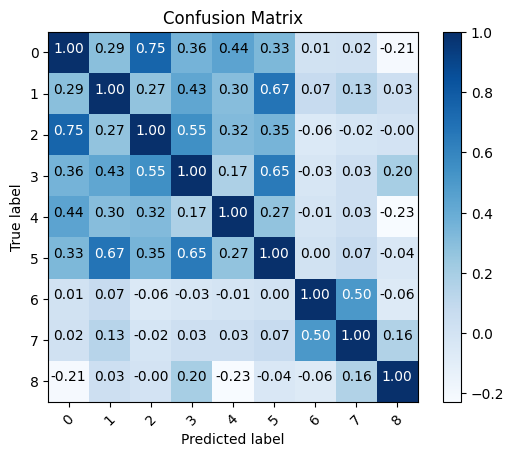

In [20]:
plot_confusion_matrix(metrics.pairwise.cosine_similarity(similarities1))

In [ ]:
dd = ["b", "c", "b", "c", "b", "c", "a", "a", "d"]
jj = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [75]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(similarities1)

# Step 4: Evaluate the clusters
for i, sentence in enumerate(sentences):
    print(f"{clusters[i]}",end=" ")

4 4 4 4 2 2 2 4 4 2 4 2 1 0 1 0 0 0 0 3 0 1 1 1 1 1 1 2 1 0 2 3 3 3 3 3 3 3 3 3 3 

# bert-base-uncased

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

# Step 2: Generate sentence embeddings
model2 = AutoModel.from_pretrained("bert-base-uncased")
with torch.no_grad():
    outputs = model2(**inputs)
    sentence_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

In [95]:
tokenizer.tokenize("Hello, world!")

['hello', ',', 'world', '!']

In [96]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("Hello, world!"))

[7592, 1010, 2088, 999]

In [77]:
sentence_embeddings.shape

(41, 768)

In [78]:
similarities2 = model1.similarity(sentence_embeddings, sentence_embeddings)

In [79]:
similarities2.shape

torch.Size([41, 41])

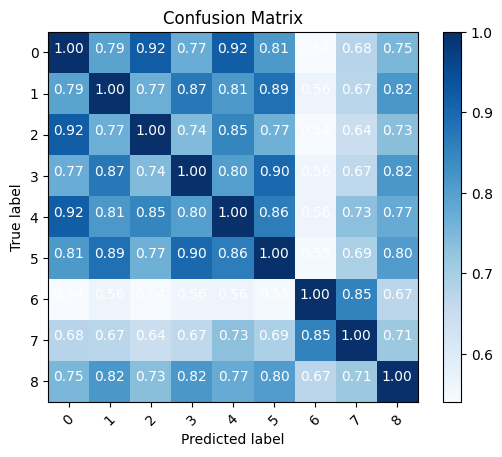

In [28]:
plot_confusion_matrix(similarities2)

In [29]:
dd = ["b", "c", "b", "c", "b", "c", "a", "a", "d"]
jj = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [80]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

# Step 4: Evaluate the clusters
for i, sentence in enumerate(sentences):
    print(f"{clusters[i]}",end=" ")

4 4 4 4 2 2 2 4 2 2 4 4 1 1 1 0 0 0 1 3 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 

# all-mpnet-base-v2

In [81]:
model3 = SentenceTransformer("all-mpnet-base-v2")

In [82]:
embeddings3 = model3.encode(sentences)
print(embeddings3.shape)

(41, 768)


In [83]:
similarities3 = model3.similarity(embeddings3, embeddings3)

In [ ]:
plot_confusion_matrix(similarities3)

In [109]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings3)

# Step 4: Evaluate the clusters
for i, sentence in enumerate(sentences):
    print(f"{clusters[i]}",end=" ")

1 2 1 2 2 2 2 2 0 2 2 2 4 0 4 0 0 0 4 4 0 1 1 1 1 1 1 1 1 4 4 3 4 3 4 4 3 4 4 4 3 

In [32]:
dd = {0: 'coding', 1: 'entertainment', 2: 'finance', 3: 'notes', 4: 'quotes'}

In [ ]:
# 1 2 1 2 2 2 2 2 0 2 2 2 4 0 4 0 0 0 4 4 0 1 1 1 1 1 1 1 1 4 4 3 4 3 4 4 3 4 4 4 3 
#4 4 4 4 2 2 2 4 2 2 4 4 1 1 1 0 0 0 1 3 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 
#4 4 4 4 2 2 2 4 4 2 4 2 1 0 1 0 0 0 0 3 0 1 1 1 1 1 1 2 1 0 2 3 3 3 3 3 3 3 3 3 3 

In [97]:
inputs['input_ids'] 

tensor([[  101,  1996,  2783,  ...,     0,     0,     0],
        [  101, 12441,  3945,  ...,     0,     0,     0],
        [  101,  2005,  1996,  ...,     0,     0,     0],
        ...,
        [  101,  8424,  2003,  ...,     0,     0,     0],
        [  101,  2166,  2003,  ...,     0,     0,     0],
        [  101,  2017,  4426,  ...,     0,     0,     0]])

In [94]:
token_ids = tokenizer.convert_tokens_to_ids(inputs['input_ids'])

TypeError: argument 'token': 'Tensor' object cannot be converted to 'PyString'

In [86]:
detokenized_text = tokenizer.decode(token_ids)

In [87]:
detokenized_text

'[UNK] [UNK] [UNK]'

In [98]:
embeddings3

array([[-0.01096508,  0.03067075, -0.00596267, ..., -0.02689151,
        -0.0193006 ,  0.021617  ],
       [ 0.03476562, -0.04191125,  0.00615297, ...,  0.01511467,
        -0.01303751,  0.03174061],
       [ 0.02132742,  0.03353314, -0.00805786, ...,  0.00141287,
         0.03132506,  0.00851265],
       ...,
       [ 0.03640559,  0.05965174,  0.00641698, ...,  0.0230027 ,
         0.03339256, -0.01151166],
       [ 0.04606126,  0.02744923, -0.01178644, ...,  0.0120198 ,
         0.0660445 , -0.05472593],
       [ 0.04949283,  0.03024996, -0.00536004, ...,  0.01294735,
         0.02067072,  0.02048561]], dtype=float32)

In [101]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
def get_closest_sentence(embedding, sentence_embeddings, sentences):
    similarities = util.pytorch_cos_sim(embedding, sentence_embeddings)
    closest_idx = np.argmax(similarities)
    return sentences[closest_idx][:20]

for e in embeddings3:
    example_embedding = e 
    closest_sentence = get_closest_sentence(e, embeddings3, sentences)
    print(closest_sentence,end=" | ")

The current sorting  | Binary Search Tree o | For the 'two-sum' pr | Use BFS for shortest | Extract repetitive A | Switched from axios  | Upgraded React from  | Bug: NullPointerExce | Dropdown menu does n | Unit test failing du | Binary Search Tree o | test('fetchData retu | In Elden Ring, prior | The Witcher 3: Wild  | In Cyberpunk 2077, i | In Inception, the sp | The Mandalorian Seas | In The Matrix, the r | In football, the 4-3 | Lionel Messi's World | The Marvel Cinematic | Keep a list of movie | Diversify your inves | Review your credit r | Automate your saving | Consider refinancing | Track your expenses  | Grocery List
Need to | To-Do List for Home  | Meeting Notes - 10/1 | Travel Itinerary - E | Wisdom and Personal  | Resilience and Deter | Self-Reflection Be y | Hope and Perseveranc | Personal Potential T | No act of kindness,  | I have no special ta | Courage is not the a | Life is what happens | You yourself, as muc | 

In [102]:
# 1 2 1 2 2 2 2 2 0 2 2 2 4 0 4 0 0 0 4 4 0 1 1 1 1 1 1 1 1 4 4 3 4 3 4 4 3 4 4 4 3 

In [103]:
for s in sentences:
    print(s[:20],end=" | ")

The current sorting  | Binary Search Tree o | For the 'two-sum' pr | Use BFS for shortest | Extract repetitive A | Switched from axios  | Upgraded React from  | Bug: NullPointerExce | Dropdown menu does n | Unit test failing du | Binary Search Tree o | test('fetchData retu | In Elden Ring, prior | The Witcher 3: Wild  | In Cyberpunk 2077, i | In Inception, the sp | The Mandalorian Seas | In The Matrix, the r | In football, the 4-3 | Lionel Messi's World | The Marvel Cinematic | Keep a list of movie | Diversify your inves | Review your credit r | Automate your saving | Consider refinancing | Track your expenses  | Grocery List
Need to | To-Do List for Home  | Meeting Notes - 10/1 | Travel Itinerary - E | Wisdom and Personal  | Resilience and Deter | Self-Reflection Be y | Hope and Perseveranc | Personal Potential T | No act of kindness,  | I have no special ta | Courage is not the a | Life is what happens | You yourself, as muc | 

In [111]:
import numpy as np
from typing import List, Optional, Union

class TextEmbeddingDBSCAN:
    def __init__(self, eps: float, min_samples: int, distance_metric: str = 'cosine'):
        """
        Initialize DBSCAN for text embeddings with flexible distance metrics.
        
        Parameters:
        -----------
        eps : float
            Maximum distance threshold for clustering
        min_samples : int
            Minimum number of points required to form a dense region
        distance_metric : str, optional (default='cosine')
            Distance metric to use for clustering. Options:
            - 'cosine': Cosine distance (recommended for text embeddings)
            - 'euclidean': Standard Euclidean distance
        """
        self.eps = eps
        self.min_samples = min_samples
        self.distance_metric = distance_metric
        self.labels_ = None
    
    def _calculate_distance(self, point1: np.ndarray, point2: np.ndarray) -> float:
        """
        Calculate distance between two points based on selected metric.
        
        Parameters:
        -----------
        point1 : np.ndarray
            First point (embedding)
        point2 : np.ndarray
            Second point (embedding)
        
        Returns:
        --------
        float
            Distance between points
        """
        if self.distance_metric == 'cosine':
            # Cosine distance: 1 - cosine similarity
            return 1 - np.dot(point1, point2) / (
                np.linalg.norm(point1) * np.linalg.norm(point2)
            )
        elif self.distance_metric == 'euclidean':
            return np.linalg.norm(point1 - point2)
        else:
            raise ValueError(f"Unsupported distance metric: {self.distance_metric}")
    
    def _get_neighbors(self, point: np.ndarray, points: np.ndarray) -> List[int]:
        """
        Find all points within eps distance of the given point.
        
        Parameters:
        -----------
        point : np.ndarray
            Reference point (embedding)
        points : np.ndarray
            Array of all point embeddings
        
        Returns:
        --------
        List[int]
            Indices of neighboring points
        """
        neighbors = []
        for i, other_point in enumerate(points):
            if self._calculate_distance(point, other_point) <= self.eps:
                neighbors.append(i)
        return neighbors
    
    def fit(self, embeddings: np.ndarray) -> 'TextEmbeddingDBSCAN':
        """
        Perform DBSCAN clustering on text embeddings.
        
        Parameters:
        -----------
        embeddings : np.ndarray
            Text embeddings to be clustered
        
        Returns:
        --------
        TextEmbeddingDBSCAN
            Fitted clustering instance
        """
        n_points = len(embeddings)
        # Initialize all points as unvisited (labeled -1)
        self.labels_ = np.full(n_points, -1)
        
        # Current cluster label
        current_cluster = 0
        
        # Iterate through all points
        for point_idx in range(n_points):
            # Skip already visited points
            if self.labels_[point_idx] != -1:
                continue
            
            # Find neighbors of the current point
            neighbors = self._get_neighbors(embeddings[point_idx], embeddings)
            
            # If not enough neighbors, mark as noise
            if len(neighbors) < self.min_samples:
                self.labels_[point_idx] = -1  # Noise point
                continue
            
            # Start a new cluster
            self.labels_[point_idx] = current_cluster
            
            # Process neighbors
            seed_set = set(neighbors)
            seed_set.remove(point_idx)
            
            while seed_set:
                current_point_idx = seed_set.pop()
                
                # Skip if already processed
                if self.labels_[current_point_idx] == -1:
                    self.labels_[current_point_idx] = current_cluster
                elif self.labels_[current_point_idx] != -1:
                    continue
                
                # Find neighbors of the current point
                current_neighbors = self._get_neighbors(
                    embeddings[current_point_idx], embeddings
                )
                
                # Expand cluster if enough neighbors
                if len(current_neighbors) >= self.min_samples:
                    seed_set.update(current_neighbors)
            
            # Move to next cluster
            current_cluster += 1
        
        return self

# Example usage with text embeddings
def main():
    # Simulate text embeddings (normally these would come from an embedding model)
    # This is a simplified example with 10 embeddings of 50 dimensions
    np.random.seed(42)
    
    # Simulate embeddings for different topics/clusters
    topic1_embeddings = np.random.normal(0, 0.1, (5, 50))
    topic2_embeddings = np.random.normal(1, 0.1, (5, 50))
    different_topic_embeddings = np.random.normal(5, 0.5, (5, 50))
    
    # Combine embeddings
    all_embeddings = np.vstack([topic1_embeddings, topic2_embeddings, different_topic_embeddings])
    
    # Create and fit DBSCAN
    dbscan = TextEmbeddingDBSCAN(
        eps=0.3,  # Adjust based on your embedding space
        min_samples=2,
        distance_metric='cosine'  # Recommended for text embeddings
    )
    dbscan.fit(all_embeddings)
    
    # Print cluster labels and analysis
    print("Cluster labels:", np.unique(dbscan.labels_))
    print("Number of clusters:", len(np.unique(dbscan.labels_[dbscan.labels_ != -1])))
    print("Number of noise points:", np.sum(dbscan.labels_ == -1))
    
    # Optional: Detailed cluster breakdown
    for cluster in np.unique(dbscan.labels_[dbscan.labels_ != -1]):
        cluster_points = np.sum(dbscan.labels_ == cluster)
        print(f"Cluster {cluster}: {cluster_points} points")

# if __name__ == "__main__":
#     main()

In [123]:


# Cluster embeddings
dbscan = TextEmbeddingDBSCAN(
    eps=0.4,  # Adjust based on your embeddings
    min_samples=2,
    distance_metric='cosine'
)
dbscan.fit(embeddings3)

# Access cluster labels
# cluster_labels = dbscan.labels_
dbscan.labels_

array([-1,  0, -1, -1, -1, -1, -1, -1, -1,  1,  0,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
        2, -1, -1, -1,  2, -1, -1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
import numpy as np

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, X):
        n = X.shape[0]
        self.labels = np.full(n, -1)  # Initialize all points as noise (-1)
        cluster_id = 0

        for point_idx in range(n):
            if self.labels[point_idx] != -1:  # Skip already visited points
                continue
            
            neighbors = self._region_query(X, point_idx)
            if len(neighbors) < self.min_samples:
                self.labels[point_idx] = -1  # Mark as noise
            else:
                self._expand_cluster(X, point_idx, neighbors, cluster_id)
                cluster_id += 1

    def _region_query(self, X, point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, point_idx, neighbors, cluster_id):
        self.labels[point_idx] = cluster_id
        queue = list(neighbors)

        while queue:
            current_point = queue.pop(0)
            if self.labels[current_point] == -1:  # If it's noise, make it part of the cluster
                self.labels[current_point] = cluster_id

            if self.labels[current_point] != -1:  # Skip already processed points
                continue

            self.labels[current_point] = cluster_id
            current_neighbors = self._region_query(X, current_point)
            if len(current_neighbors) >= self.min_samples:
                queue.extend(current_neighbors)

    def get_labels(self):
        return self.labels


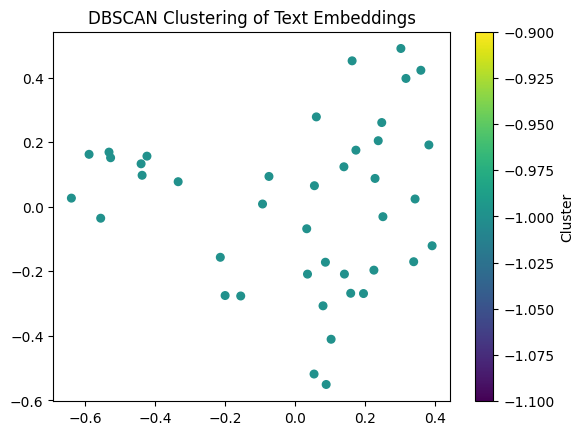

Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [125]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example: Assume `embeddings` is your precomputed text embeddings
# Replace this with your actual embeddings
np.random.seed(42)
# embeddings = np.random.rand(100, 512)  # Simulated embeddings for 100 texts, each of dimension 512

# Normalize embeddings (optional, but recommended for cosine similarity)
embeddings = normalize(embeddings3)

# Apply DBSCAN
eps = 0.5  # Adjust based on your data
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')  # You can also use 'cosine' for text
labels = dbscan.fit_predict(embeddings)

# Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize Clusters
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering of Text Embeddings")
plt.colorbar(label="Cluster")
plt.show()

# Output clusters
print("Cluster labels:", labels)


In [3]:
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
class TextEmbeddingCentroidAnalyzer:
    def __init__(self, model_name='all-mpnet-base-v2'):
        # Load the Sentence Transformer model
        self.model = SentenceTransformer(model_name)
    
    def generate_embeddings(self, texts):
        """
        Generate embeddings for a list of texts
        
        Args:
            texts (list): List of text strings
        
        Returns:
            numpy.ndarray: Embedding matrix
        """
        return self.model.encode(texts, convert_to_numpy=True)
    
    def calculate_class_centroids(self, texts, labels):
        """
        Calculate centroids for each unique class
        
        Args:
            texts (list): List of text strings
            labels (list/numpy.ndarray): Corresponding class labels
        
        Returns:
            dict: Centroids for each class
        """
        # Generate embeddings
        embeddings = self.generate_embeddings(texts)
        
        # Calculate centroids
        centroids = {}
        for unique_class in np.unique(labels):
            class_mask = np.array(labels) == unique_class
            class_embeddings = embeddings[class_mask]
            
            # Compute centroid
            centroid = np.mean(class_embeddings, axis=0)
            
            # Optional: L2 normalization of centroid
            centroid = centroid / np.linalg.norm(centroid)
            
            centroids[unique_class] = centroid
        
        return centroids
    
    def find_nearest_centroid(self, text, centroids):
        """
        Find the nearest class centroid for a given text
        
        Args:
            text (str): Input text to classify
            centroids (dict): Precomputed class centroids
        
        Returns:
            str: Predicted class
        """
        # Generate embedding for the input text
        text_embedding = self.generate_embeddings([text])[0]
        
        # Compute cosine similarities
        similarities = {}
        for class_name, centroid in centroids.items():
            # Compute cosine similarity
            similarity = np.dot(text_embedding, centroid)
            similarities[class_name] = similarity
        
        # Return class with highest similarity
        return max(similarities, key=similarities.get)

# Example usage
def main():
    # Sample texts and labels
    texts = [
        "I love this product, it's amazing!",
        "Terrible experience, would not recommend.",
        "Neutral about this item, it's okay.",
        "Great customer service and quick delivery.",
        "Disappointing and slow shipping.",
        "Average product, nothing special."
    ]
    
    labels = [
        'positive', 
        'negative', 
        'neutral', 
        'positive', 
        'negative', 
        'neutral'
    ]

    # Initialize analyzer
    analyzer = TextEmbeddingCentroidAnalyzer()
    
    # Calculate centroids
    centroids = analyzer.calculate_class_centroids(texts, labels)
    
    # Print centroids
    for class_name, centroid in centroids.items():
        print(f"Centroid for {class_name}: {centroid[:5]}...")
    
    # Example classification
    test_text = "The service was good"
    predicted_class = analyzer.find_nearest_centroid(test_text, centroids)
    print(f"\nPredicted class for '{test_text}': {predicted_class}")

if __name__ == "__main__":
    main()

Centroid for negative: [ 0.03091895  0.01277394 -0.00746914  0.00342164 -0.04783112]...
Centroid for neutral: [ 0.01917397 -0.04087798  0.00191817  0.0119592  -0.09352213]...
Centroid for positive: [-0.00676643 -0.03537674 -0.03555089 -0.03492629 -0.02183814]...

Predicted class for 'The service was good': negative
